In [4]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import os
import sys
import random
# to remove the limitation on the number of columns that can be displayed
pd.set_option('display.max_columns', None)

<div dir="rtl">

ستون Unnamed: 0 عملا کاربردی ندارد و حذفش میکنیم

</div>

In [5]:
# read data and drop [Unnamed: 0] column
data = pd.read_csv("marketing_AB.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


<div dir="rtl">

داده null در data وجود ندارد.

داده ما دارای 3 نوع type میباشد: bool, int64, object

تعداد 588101  شکرت کننده داریم.
</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [7]:
data.isnull().any()

user id          False
test group       False
converted        False
total ads        False
most ads day     False
most ads hour    False
dtype: bool

In [8]:
data.describe(include="all")

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,2,2,NaN,7,NaN
top,NaN,ad,False,NaN,Friday,NaN
freq,NaN,564577,573258,NaN,92608,NaN
mean,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


<div dir="rtl">

2 گروه در ستون test group داریم که 564577 نفر تبلیغات مشاهده کردند(ad) و 23524 نفر تبلیغات مشاهده نکردند(psa)

</div>

In [9]:
data["test group"].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

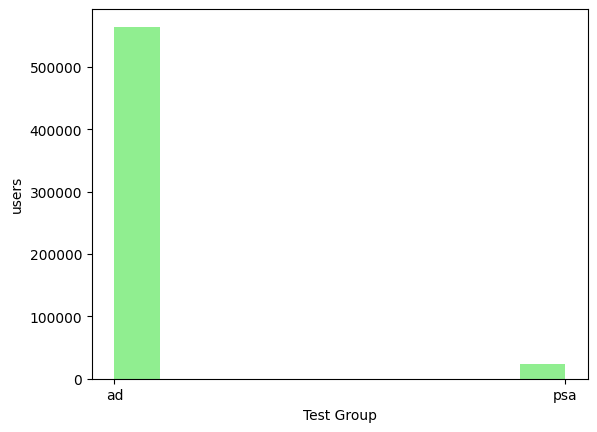

In [10]:
plt.hist(data['test group'], color='lightgreen')
plt.xlabel('Test Group')
plt.ylabel('users')
plt.show()

<div dir="rtl">

ستون converted نشان میدهد که 573258 نفر خرید نکردند و 14843 نفر خرید کردند

</div>

In [11]:
data["converted"].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

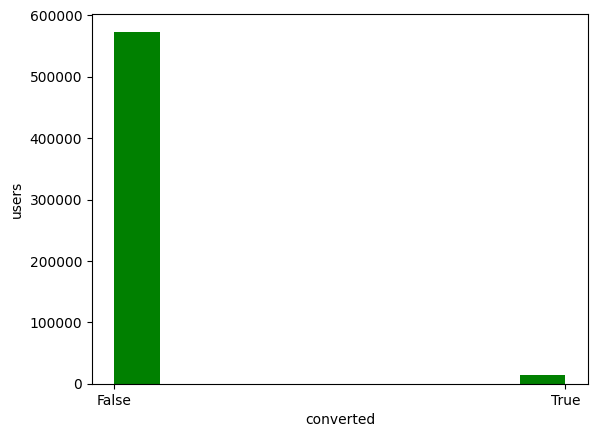

In [12]:
plt.hist(data["converted"].astype("str"), color='green')
plt.xlabel('converted')
plt.ylabel('users')
plt.show()

<div dir="rtl">

بین ساعت های 10 تا 15 بیشترین بازدید تبلیغات را داریم

</div>

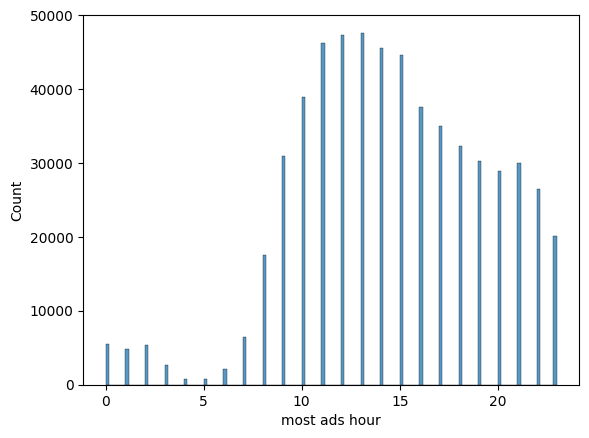

In [83]:
sns.histplot(data["most ads hour"])
plt.show()

<div dir="rtl">

به دلیل اینکه متغییر converted داده ما دارای 2 حالت true و false میباشد و test group به 2 گروه ad و psa تقسیم شده و متغییر های ما categorical  هستند 

می توانیم از binomial , chi-square استفاده کنیم.

</div>

In [40]:
# binomial

# ads group and psa group data
ads = data[data['test group'] == 'ad']
num_ads = len(ads)

psa = data[data['test group'] == 'psa']
num_psa = len(psa)

# number of users who purchases
ads_conv = np.sum(ads['converted'])
psa_conv = np.sum(psa['converted'])

# mean
ads_mean = ads.converted.mean() 
psa_mean = psa.converted.mean() 
mean_diff = ads_mean-psa_mean

# Number of simulations
n = 10000

# Simulating the number of users who made purchases in each group using the binomial method
ads_converted = np.random.binomial(num_ads, data.converted.mean(), n) / num_ads
psa_converted = np.random.binomial(num_psa, data.converted.mean(), n) / num_psa

p_diffs = ads_converted - psa_converted

p_value = (p_diffs> mean_diff).mean()*100
print("p_value:", p_value)

p_value: 0.0


<div dir="rtl">

با توجه به اینکه p_value = 0 از threshold = 0.05 کمتر از شده است میتوانیم نتیجه بگیریم که تبلیغات تاثیر مثبتی در خرید داشته است.

</div>

<div dir="rtl">

تست chi_square:

</div>

In [73]:
ct = pd.crosstab(data["test group"], data["converted"], margins=True)
ct

converted,False,True,All
test group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


In [74]:
d = np.array([ct.iloc[0][: -1].values, ct.iloc[1][: -1].values])
d

array([[550154,  14423],
       [ 23104,    420]], dtype=int64)

In [75]:
result = stats.chi2_contingency(d)
print("p_value:", result.pvalue)

p_value: 1.9989623063390075e-13


<div dir="rtl">

در تست chi_square هم pvalue کمتر از threshold=0.05 شده در نتیجه متغییرهای converted و test group ارتباط معنا داری باهم دارند.

</div>

In [76]:
# converted and most ads day
ct2 = pd.crosstab(data["converted"], data["most ads day"], margins=True)
ct2

most ads day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
converted,,,,,,,,
False,90551,84216,79941,83301,81192,75167,78890,573258
True,2057,2857,1719,2090,1790,2312,2018,14843
All,92608,87073,81660,85391,82982,77479,80908,588101


In [77]:
d2 = np.array([ct2.iloc[0][: -1].values, ct2.iloc[1][: -1].values])
d2

array([[90551, 84216, 79941, 83301, 81192, 75167, 78890],
       [ 2057,  2857,  1719,  2090,  1790,  2312,  2018]], dtype=int64)

In [78]:
result2 = stats.chi2_contingency(d2)
print("p_value2:", result2.pvalue)

p_value2: 1.932184379244731e-85


In [79]:
# converted and most ads hour
ct3 = pd.crosstab(data["converted"], data["most ads hour"], margins=True)
ct3

most ads hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
converted,,,,,,,,,,,,,,,,,,,,,,,,,
False,5434,4740,5294,2651,711,749,2022,6289,17283,30409,38101,45188,46171,46479,44367,43358,36411,34001,31438,29541,28061,29109,25742,19709,573258
True,102,62,39,28,11,16,46,116,344,595,838,1022,1127,1176,1281,1325,1156,987,885,811,862,867,690,457,14843
All,5536,4802,5333,2679,722,765,2068,6405,17627,31004,38939,46210,47298,47655,45648,44683,37567,34988,32323,30352,28923,29976,26432,20166,588101


In [80]:
d3 = np.array([ct3.iloc[0][: -1].values, ct3.iloc[1][: -1].values])
d3

array([[ 5434,  4740,  5294,  2651,   711,   749,  2022,  6289, 17283,
        30409, 38101, 45188, 46171, 46479, 44367, 43358, 36411, 34001,
        31438, 29541, 28061, 29109, 25742, 19709],
       [  102,    62,    39,    28,    11,    16,    46,   116,   344,
          595,   838,  1022,  1127,  1176,  1281,  1325,  1156,   987,
          885,   811,   862,   867,   690,   457]], dtype=int64)

In [81]:
result3 = stats.chi2_contingency(d3)
print("p_value3:", result3.pvalue)

p_value3: 8.027629823696771e-77


<div dir = "rtl">

بین متغییرهای most ads hour و converted ارتباط معناداری وجود دارد.(چون p_value کمتر از threshold=0.05 است)

</div>